# Exploratory Data Analysis (EDA)
---
---

## Imports and Paths
---

In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2


In [2]:
BASE_DIR = os.path.dirname(os.getcwd())
DATA_DIR  = os.path.join(BASE_DIR, 'chest_xray')

print(BASE_DIR)
print(DATA_DIR)

/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2
/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2/chest_xray


In [3]:
from src.visualizations import (
    plot_dataset_distribution,
    plot_image_grid_all_subsets, plot_intensity_distributions
)

## Distribution of Samples
---

The way the dataset is provided, is not optimal, as the train/test/val ratio is weird. Normally 10% would be reserved for testing and the rest would be used in a `K-fold CV` training loop. Also the `NORMAL` class has less than half images than the `PNEUMONIA` class, this will also have to be addressed.

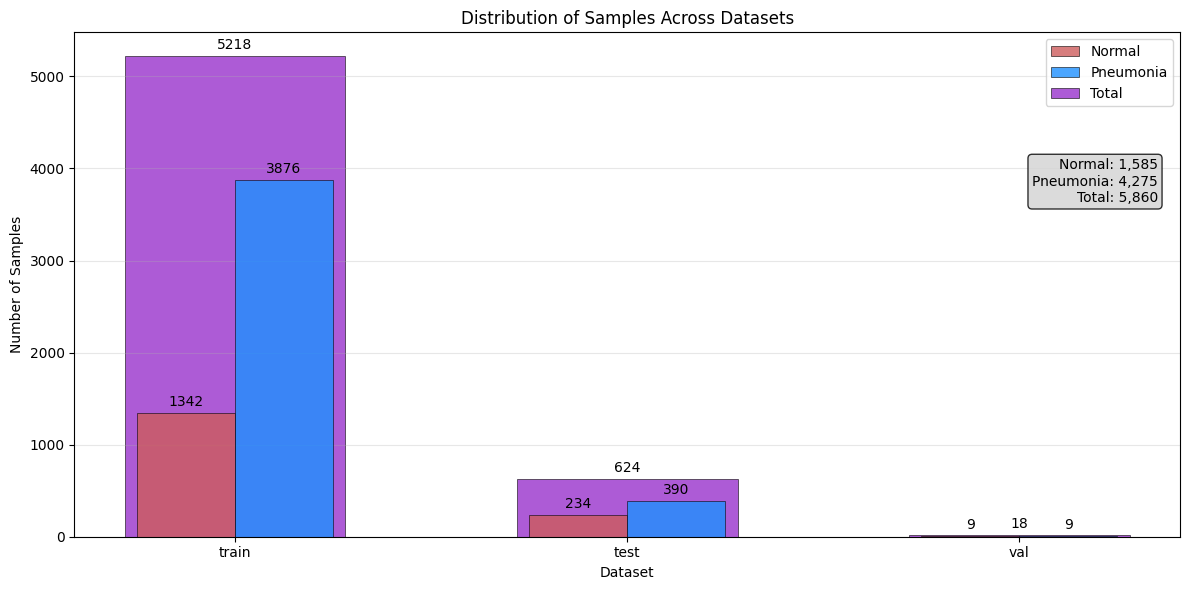

In [4]:
counts = plot_dataset_distribution(DATA_DIR)

In [5]:
counts

{'train': {'NORMAL': 1342, 'PNEUMONIA': 3876},
 'test': {'NORMAL': 234, 'PNEUMONIA': 390},
 'val': {'NORMAL': 9, 'PNEUMONIA': 9}}

## Random image inspection
---

Inspecting a random subset of images, we can see that they are all grayscale. Another thing to note is the fact that their sizes vary, so they will have to be resized.

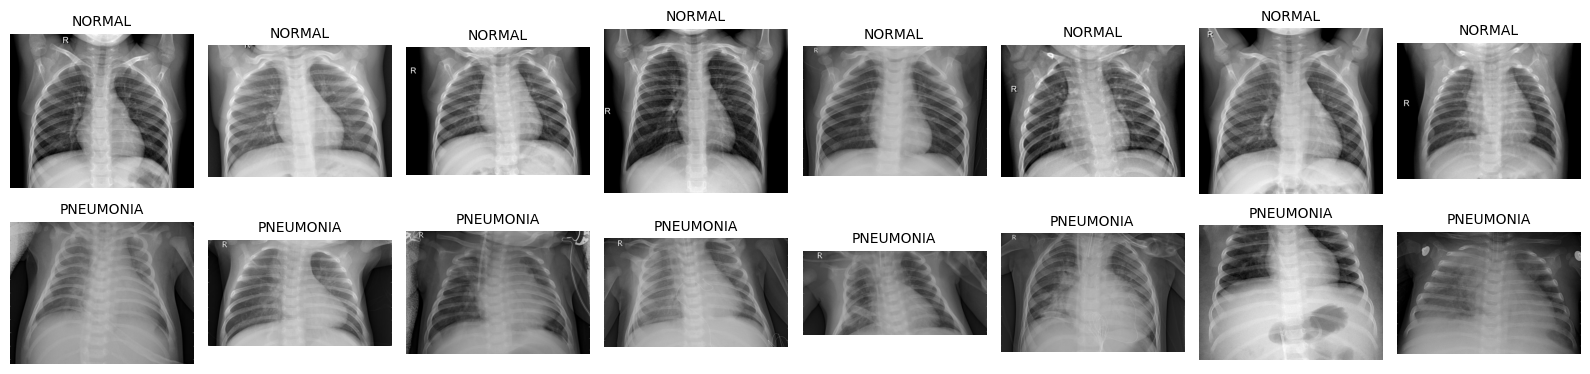

In [7]:
plot_image_grid_all_subsets(
    base_dir=DATA_DIR,
    n=16
)

## Intensity distribution
---

The intensities differ between the two classes. this might be an indicator that a classical ML approach with the appropriate features could suffice in this task.


--- Class: NORMAL ---
  Number of images (N): 1583
  Mean histogram range: min=8.9093e-05, max={np.max(mean_hist):.4e}
  Std Dev of normalized histograms range: min=3.1449e-04, max=4.4566e-02
  Distance between upper/lower Std Dev lines (Mean ± SD, floored at 0) range: min=4.0729e-04, max=8.9132e-02
---

--- Class: PNEUMONIA ---
  Number of images (N): 4273
  Mean histogram range: min=3.1423e-05, max={np.max(mean_hist):.4e}
  Std Dev of normalized histograms range: min=1.0069e-04, max=5.2360e-02
  Distance between upper/lower Std Dev lines (Mean ± SD, floored at 0) range: min=1.3544e-04, max=9.0843e-02
---


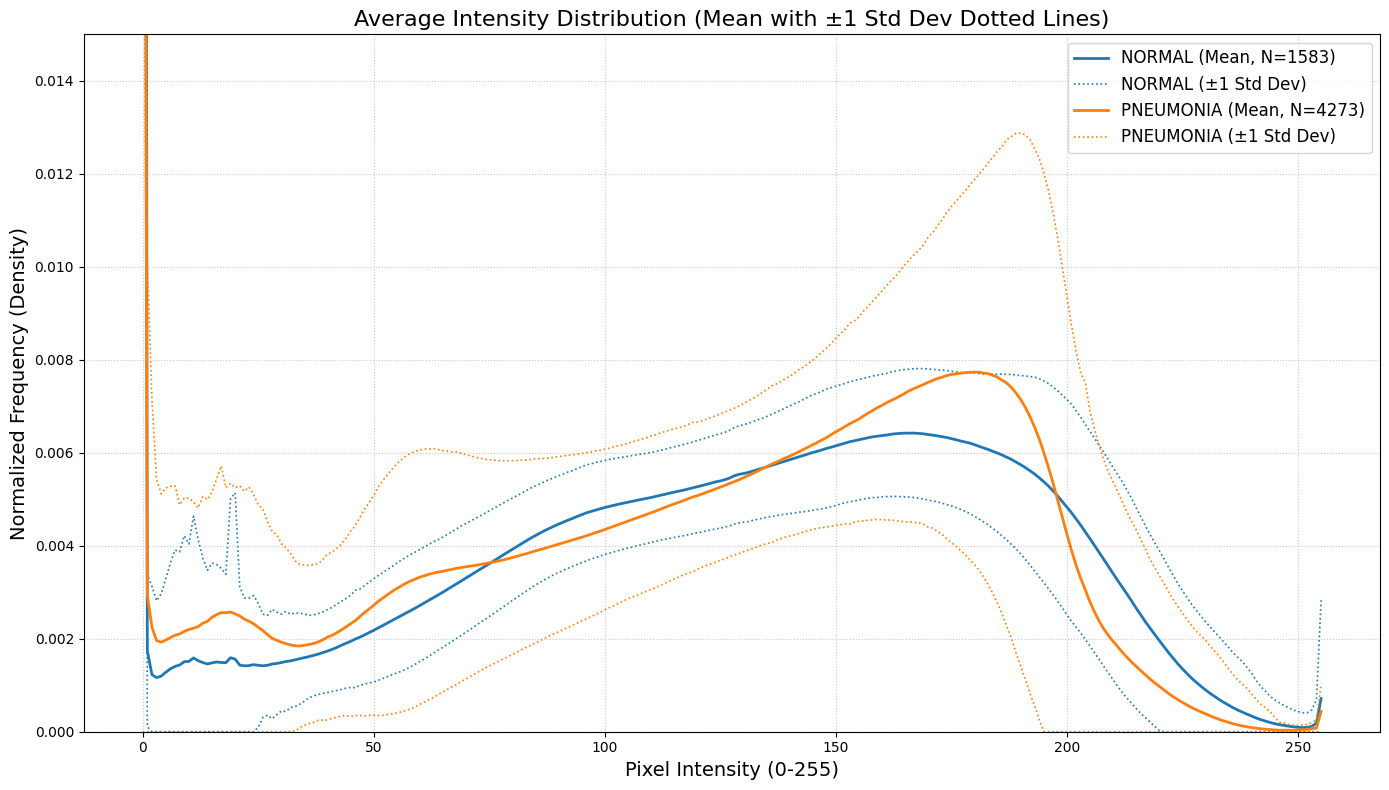

In [8]:
plot_intensity_distributions(
    base_path=DATA_DIR,
    ylim = (0, 0.015)   # Adjusted as needed for better visibility
)

## Conclusion
---

The `train/test/val` datasets will have to be remade in the preprocessing step, along with several augmentations to make the images easier to handle. Also, the images have different size, which will have to be addressed. We can see that the `PNEUMONIA` class has a different distribution of pixel intensities than the `NORMAL` class, especially in the $150-250$ range of intensities, which indicates that the classes might be separable (at least to some degree) with simple methods.